# FINAL LSTM MODEL

Epoch 1/5
506/506 ━━━━━━━━━━━━━━━━━━━━ 185s 353ms/step - accuracy: 0.8324 - loss: 0.3566 - val_accuracy: 0.9317 - val_loss: 0.1753
Epoch 2/5
506/506 ━━━━━━━━━━━━━━━━━━━━ 174s 344ms/step - accuracy: 0.9467 - loss: 0.1387 - val_accuracy: 0.9402 - val_loss: 0.1602
Epoch 3/5
506/506 ━━━━━━━━━━━━━━━━━━━━ 213s 366ms/step - accuracy: 0.9684 - loss: 0.0855 - val_accuracy: 0.9439 - val_loss: 0.1546
Epoch 4/5
506/506 ━━━━━━━━━━━━━━━━━━━━ 229s 453ms/step - accuracy: 0.9747 - loss: 0.0692 - val_accuracy: 0.9402 - val_loss: 0.1952
Epoch 5/5
506/506 ━━━━━━━━━━━━━━━━━━━━ 225s 445ms/step - accuracy: 0.9835 - loss: 0.0470 - val_accuracy: 0.9421 - val_loss: 0.1933
253/253 ━━━━━━━━━━━━━━━━━━━━ 16s 59ms/step
Accuracy: 0.9421293433906269
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      4016
           1       0.93      0.96      0.94      4071

    accuracy                           0.94      8087
   macro avg       0.94      0.94      0.94      8087
w

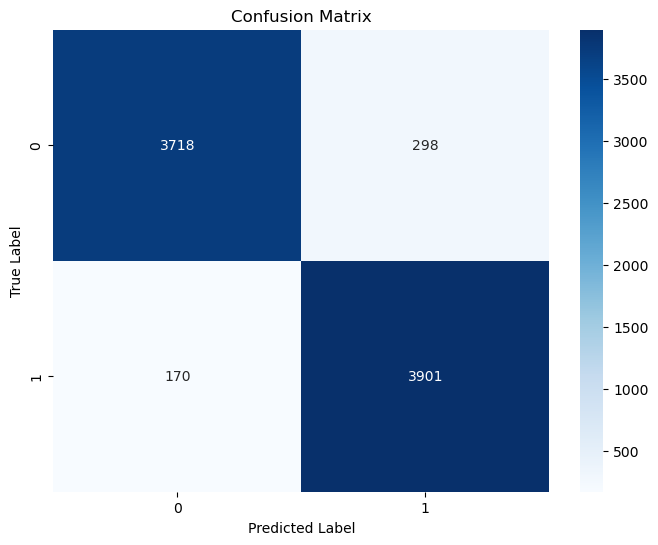

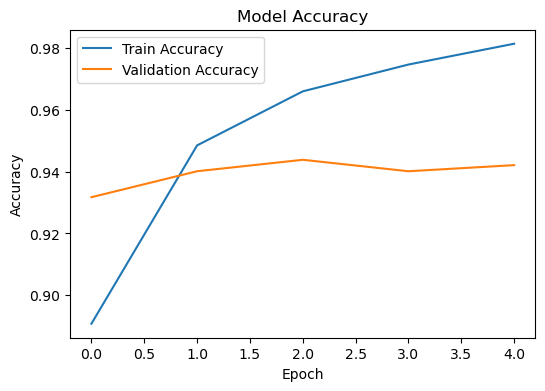

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load the dataset
file_path = r"D:\ShaluPersonal_DataSc\MSCDS_3Sem\project\FakeReviewDataset.csv"
df = pd.read_csv(file_path)

# Data Cleaning
df.dropna(subset=['text', 'label'], inplace=True)  # Drop rows with missing values
df['text'] = df['text'].str.lower().apply(lambda x: re.sub(r'[^\w\s]', '', x))  # Clean text

df['text'] = df['text'].apply(lambda x: re.sub(r'\d+', '', x))

# Prepare the data for modeling
X = df['text'].values
y = pd.factorize(df['label'])[0]
y = to_categorical(y)

# Tokenize the text data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(X_sequences, maxlen=100)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential([
    # Embedding(input_dim=10000, output_dim=128, input_length=100),
    Embedding(input_dim=10000, output_dim=128),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(y.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Model Evaluation
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

print("Accuracy:", accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot Accuracy Graph
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [2]:
import pickle

# Save the trained model
model.save("lstm_fake_review_model.h5")

# Save the tokenizer
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

print("Model and tokenizer saved successfully!")


Model and tokenizer saved successfully!


In [ ]:
# #Optional just for try
# import pickle

# # Save the model using pickle
# with open("lstm_model.pkl", "wb") as f:
#     pickle.dump(model, f)

# print("Model saved as 'lstm_model.pkl'")